In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(len(X_train), len(X_test))

60000 10000


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Your Code ...
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]
# Your Code ...

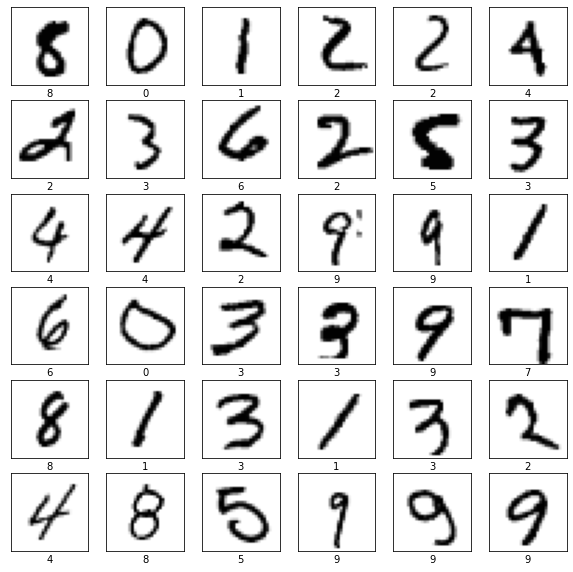

In [4]:
rndsuff = np.random.randint(0, len(X_train)-1, size=len(X_train), dtype='l')

# Show images and labels
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[rndsuff[i]], cmap=plt.cm.binary)
    plt.xlabel(y_train[rndsuff[i]])
plt.show()

In [5]:
# Your code ...
X_valid, X_train = X_train[:1000], X_train[55000:]
y_valid, y_train = y_train[:1000], y_train[55000:]

X_test = X_test[:1000]
y_test = y_test[:1000]
# Your code ...

In [6]:
# 2L DNN
model = keras.Sequential([    
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              # Your code ...
              loss='sparse_categorical_crossentropy',
              # Your code ...
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 182us/sample - loss: 0.1910 - accuracy: 0.9478 - val_loss: 0.3993 - val_accuracy: 0.8760
Epoch 2/10
5000/5000 [==============================] - 1s 100us/sample - loss: 0.1804 - accuracy: 0.9512 - val_loss: 0.3969 - val_accuracy: 0.8840
Epoch 3/10
5000/5000 [==============================] - 1s 100us/sample - loss: 0.1714 - accuracy: 0.9538 - val_loss: 0.4058 - val_accuracy: 0.8820
Epoch 4/10
5000/5000 [==============================] - 1s 100us/sample - loss: 0.1633 - accuracy: 0.9566 - val_loss: 0.3911 - val_accuracy: 0.8840
Epoch 5/10
5000/5000 [==============================] - 1s 100us/sample - loss: 0.1551 - accuracy: 0.9600 - val_loss: 0.3911 - val_accuracy: 0.8880
Epoch 6/10
5000/5000 [==============================] - 1s 100us/sample - loss: 0.1475 - accuracy: 0.9620 - val_loss: 0.3849 - val_accuracy: 0.8880
Epoch 7/10
5000/5000 [==============================] - 1s 100us

In [14]:
model.evaluate(X_test, y_test)

1000/1000 [==============================] - 0s 100us/sample - loss: 0.3751 - accuracy: 0.8860


[0.37510084569454194, 0.886]

In [16]:
def classifier(predictions) :
    # Your code ...
    rtn = []    
    for prediction in predictions :
        rtn.append(np.argmax(prediction))
    # Your code ...
    return np.array(rtn)

In [17]:
# Your code ...
predictions = classifier(model.predict(X_test))
# Your code ...

In [27]:
wrong_idx = y_test != predictions
print("전체갯수:"+str(len(predictions)))
print("틀린갯수:"+str(len(predictions[wrong_idx])))

전체갯수:1000
틀린갯수:85


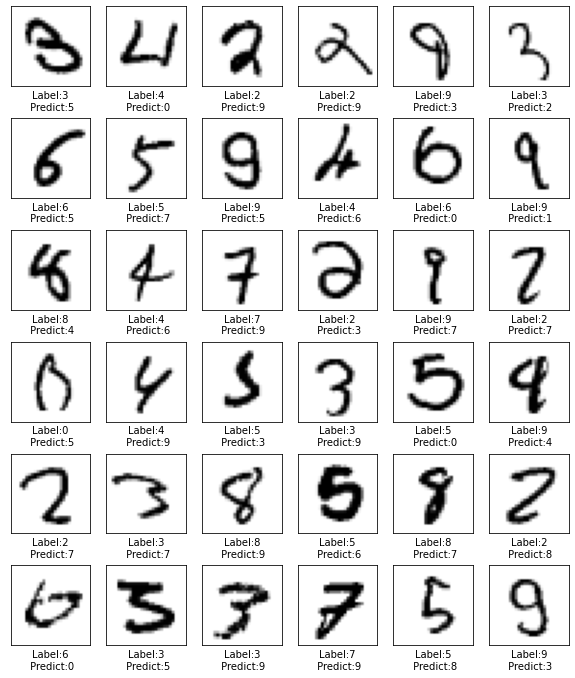

In [28]:
# Show images and labels
plt.figure(figsize=(10,12))
for i in range(36):
    plt.subplot(6, 6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[wrong_idx][i], cmap=plt.cm.binary)
    plt.xlabel("Label:" + str(y_test[wrong_idx][i])+"\n Predict:"+str(predictions[wrong_idx][i]))
    #plt.xlabel(y_test[wrong_idx[i]])
plt.show()

In [29]:
model = tf.keras.models.Sequential([
    # Your code ...
    tf.keras.layers.Conv2D(8, 3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    # Your code ...
])  

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 201us/sample - loss: 0.9483 - accuracy: 0.7816 - val_loss: 0.4841 - val_accuracy: 0.8600
Epoch 2/10
5000/5000 [==============================] - 1s 113us/sample - loss: 0.2928 - accuracy: 0.9192 - val_loss: 0.3982 - val_accuracy: 0.8880
Epoch 3/10
5000/5000 [==============================] - 1s 111us/sample - loss: 0.2353 - accuracy: 0.9306 - val_loss: 0.3549 - val_accuracy: 0.9050
Epoch 4/10
5000/5000 [==============================] - 1s 110us/sample - loss: 0.2006 - accuracy: 0.9430 - val_loss: 0.3438 - val_accuracy: 0.9020
Epoch 5/10
5000/5000 [==============================] - 1s 110us/sample - loss: 0.1769 - accuracy: 0.9494 - val_loss: 0.3202 - val_accuracy: 0.9100
Epoch 6/10
5000/5000 [==============================] - 1s 111us/sample - loss: 0.1569 - accuracy: 0.9552 - val_loss: 0.3054 - val_accuracy: 0.9180
Epoch 7/10
5000/5000 [==============================] - 1s 110us

In [33]:
model.evaluate(X_test, y_test)

1000/1000 [==============================] - 0s 85us/sample - loss: 0.2447 - accuracy: 0.9300


[0.2447099139690399, 0.93]

In [34]:
predictions = classifier(model.predict(X_test))

In [35]:
wrong_idx = y_test != predictions
print("전체갯수:"+str(len(predictions)))
print("틀린갯수:"+str(len(predictions[wrong_idx])))

전체갯수:1000
틀린갯수:70


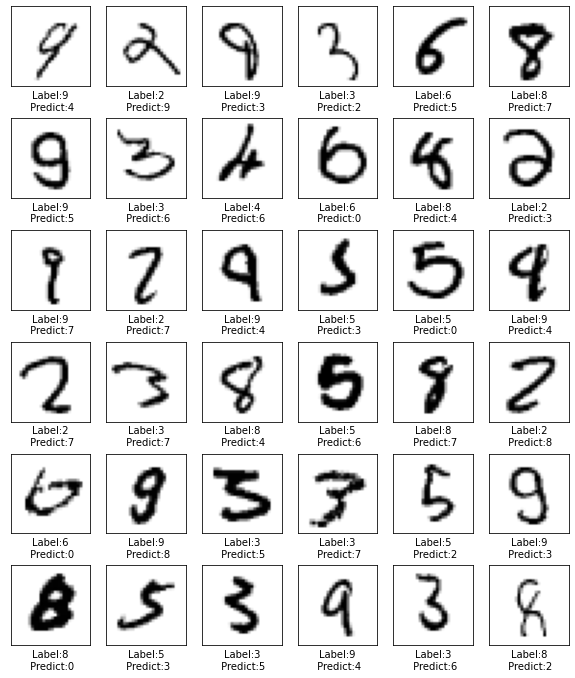

In [36]:
# Show images and labels
plt.figure(figsize=(10,12))
for i in range(36):
    plt.subplot(6, 6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[wrong_idx][i], cmap=plt.cm.binary)
    plt.xlabel("Label:" + str(y_test[wrong_idx][i])+"\n Predict:"+str(predictions[wrong_idx][i]))
    #plt.xlabel(y_test[wrong_idx[i]])
plt.show()